In [2]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
from scipy.integrate import simps

Let's put a normal prior on the probability of flipping heads.

The prior is not conjugate to the likelihood (which is binomial) but this example is simple enough that we'll be able to integrate out the parameter space

In [3]:
x = np.linspace(0,1,100)
norm_prior = norm.pdf(x, loc = 0.5, scale = 0.1)

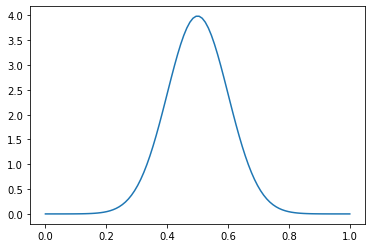

In [4]:
plt.plot(x, norm_prior);

In [5]:
def joint(n, y, theta):
    return (theta**y) *( (1-theta)**(n-y)) * (norm.pdf(theta, loc = 0.5, scale = 0.1))

def likelihood(n, y, theta):
    return (theta**y) *( (1-theta)**(n-y))

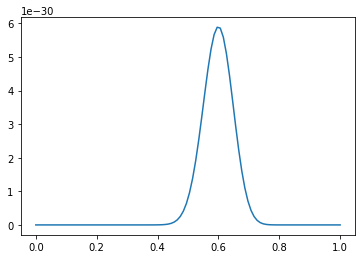

In [6]:
plt.plot(x, likelihood(100, 60, x));

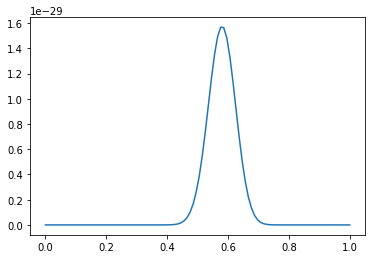

In [7]:
plt.plot(x, joint(100, 60, x));

In [8]:
# denominator
simps(joint(100, 60, x), dx=x[99]-x[0]) 

1.7313492223393783e-28

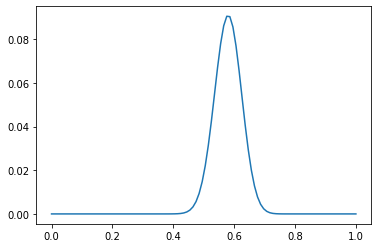

In [9]:
plt.plot(x, joint(100, 60, x) / simps(joint(100, 60, x), dx=x[99]-x[0]) );

In [10]:
simps(joint(100, 60, x) / simps(joint(100, 60, x), dx=x[99]-x[0]), dx =x[99]-x[0])

1.0

## MCMC

In [11]:
mu_current = 0.5

In [12]:
proposal_width = 1
mu_proposal = norm(mu_current, proposal_width).rvs()

mu_proposal

1.9389341083684357

In [84]:
data = np.concatenate((np.repeat(1, 60), np.repeat(0, 40)))

In [14]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
print(likelihood_current)
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
print(likelihood_proposal)

4.595423685200117e-46
2.832022738604688e-97


In [15]:
mu_prior_mu=0.5 
mu_prior_sd=0.1

In [17]:
# Compute prior probability of current and proposed mu        
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
print(prior_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
print(prior_proposal)

3.989422804014327
4.364079710267376e-45


In [18]:
p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal

In [19]:
p_accept = p_proposal / p_current

In [20]:
accept = np.random.rand() < p_accept

In [50]:
samples = 100

In [43]:
mu_proposal = norm(mu_current, proposal_width).rvs()
likelihood_current = binom(p = mu_proposal).pmf(data)


(array([60.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([1.84612299e-18, 1.09716968e-17, 2.00972707e-17, 2.92228445e-17,
        3.83484184e-17, 4.74739922e-17, 5.65995661e-17, 6.57251399e-17,
        7.48507137e-17, 8.39762876e-17, 9.31018614e-17]),
 <BarContainer object of 10 artists>)

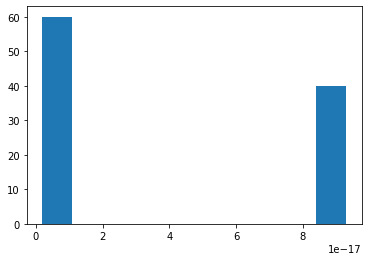

In [45]:
plt.hist(likelihood_current)

In [83]:
sum(data)

40

In [123]:
def make_simple_mcmc(samples = 1000, proposal_width = 1, mu_prior_mu = 0.5, mu_prior_sd = 0.1):
    """
    """
    np.random.seed(42)
    
    p_init=0.5

    mu_current = p_init
    posterior = [mu_current]

    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()
        
        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = binom(n = 100, p = mu_current).pmf(sum(data))
        likelihood_proposal = binom(n = 100, p = mu_proposal).pmf(sum(data))
        

        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
    
    return posterior
    

In [124]:
posterior = make_simple_mcmc(samples = 4000)

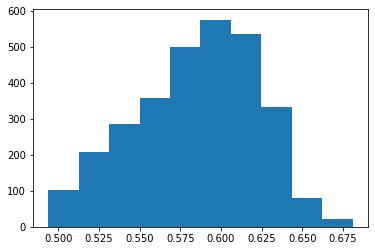

In [125]:
plt.hist(posterior[1000:]);

In [126]:
np.mean(posterior)

0.5850103934894415

In [127]:
np.std(posterior)

0.038218060812291184

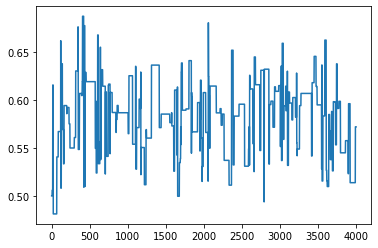

In [128]:
plt.plot(range(len(posterior)), posterior, linestyle ="-")

In [129]:
from multiprocessing import Process

In [130]:
import multiprocessing

multiprocessing.cpu_count()

12